In [2]:
from mfglib.env import Environment
from mfglib.alg import MFOMO,PriorDescent, AIDFictitiousPlay,FictitiousPlay
from mfglib.metrics import exploitability_score
import matplotlib.pyplot as plt
from mfglib.mean_field import mean_field
import torch
from mfglib.alg.greedy_policy_given_mean_field import Greedy_Policy

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d:\Program Files\anaconda3\envs\mfg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Beach bar

torch.Size([100, 3])
            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(100,)
	A(3,)
	T=15
	r_max=100

Algorithm summary:
	FictitiousPlay(alpha=None)
	atol=1e-05
	rtol=1e-05
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 4.59515  |     1.00000     |          0           |  0.000   |
|  0   | 4.59515  |     1.00000     |          0           |  0.000   |
|  1   | 48.34669 |    10.52125     |          0           |  0.009   |
|  2   | 10.58086 |     2.30262     |          0           |  0.018   |
|  3   | 13.46455 |     2.93017     |          0           |  0.029   |
|  4   | 10.85766 |     2.36285     |          0           |  0.039   |
|  5   | 8.12916  |     1.76908     |      

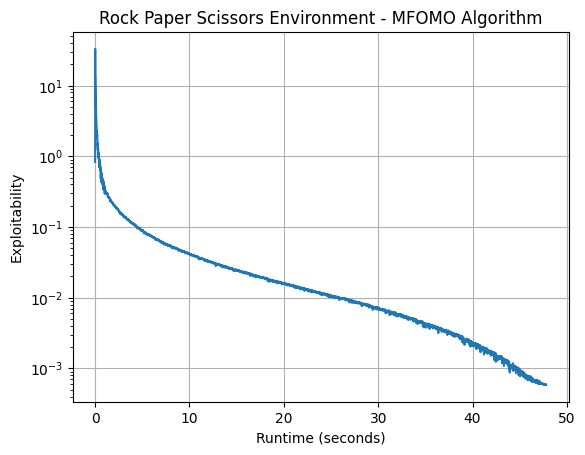

In [2]:
instance = Environment.beach_bar(n=100, bar_loc=50, T=15)

solns, expls, runtimes = FictitiousPlay(update_initial=True).solve(instance, max_iter=5000, verbose=True)

plt.semilogy(runtimes, exploitability_score(instance, solns)) 
plt.grid(True)
plt.xlabel("Runtime (seconds)")
plt.ylabel("Exploitability")
plt.title("Rock Paper Scissors Environment - MFOMO Algorithm")
plt.show()

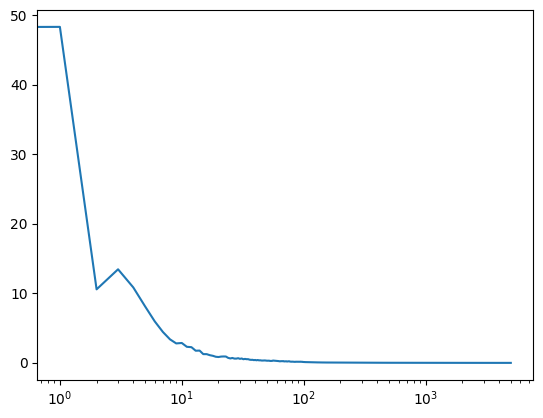

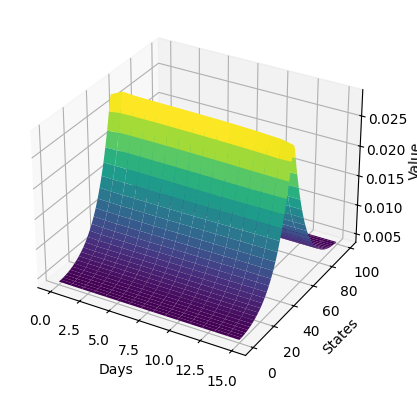

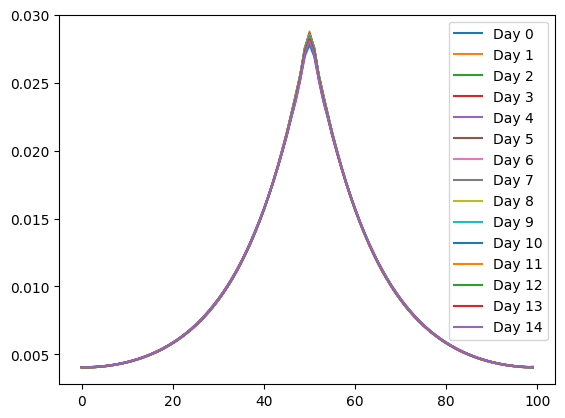

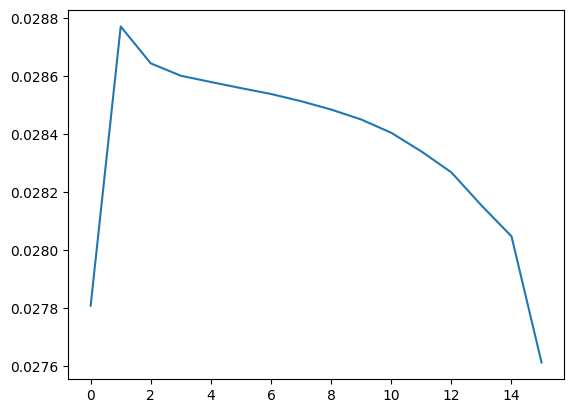

In [7]:
plt.plot(expls)
plt.xscale('log')

pi = solns[-1]
L = mean_field(instance, pi)
mu = torch.sum(L, axis=2)

mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Days")
ax.set_ylabel("States")
ax.set_zlabel("Value")

plt.show()

for day in range(15):
    plt.plot(mu[day, :], label=f"Day {day}")
plt.legend()
plt.show()
plt.plot(mu[:, 50])

### Beach bar with terminal cost

torch.Size([100, 3])
            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(100,)
	A(3,)
	T=15
	r_max=100

Algorithm summary:
	FictitiousPlay(alpha=None)
	atol=1e-05
	rtol=1e-05
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 4.58848  |     1.00000     |          0           |  0.000   |
|  0   | 4.58848  |     1.00000     |          0           |  0.000   |
|  1   | 48.34669 |    10.53653     |          0           |  0.011   |
|  2   | 10.58086 |     2.30596     |          0           |  0.022   |
|  3   | 13.46455 |     2.93442     |          0           |  0.032   |
|  4   | 10.85766 |     2.36629     |          0           |  0.041   |
|  5   | 8.12916  |     1.77165     |      

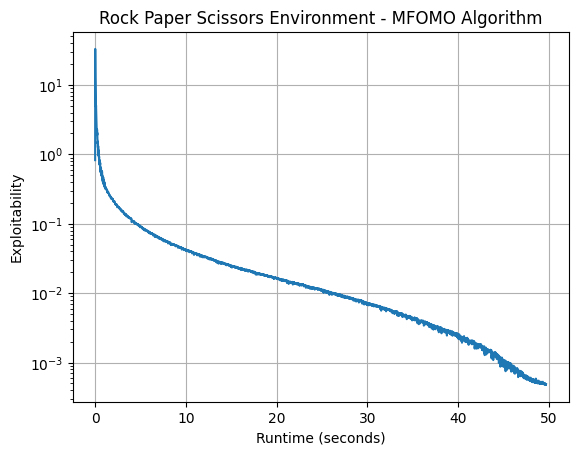

In [3]:
instance = Environment.beach_bar_terminal(n=100, bar_loc=50, T=15)

solns, expls, runtimes = FictitiousPlay(update_initial=True).solve(instance, max_iter=5000, verbose=True)

plt.semilogy(runtimes, exploitability_score(instance, solns)) 
plt.grid(True)
plt.xlabel("Runtime (seconds)")
plt.ylabel("Exploitability")
plt.title("Rock Paper Scissors Environment - MFOMO Algorithm")
plt.show()

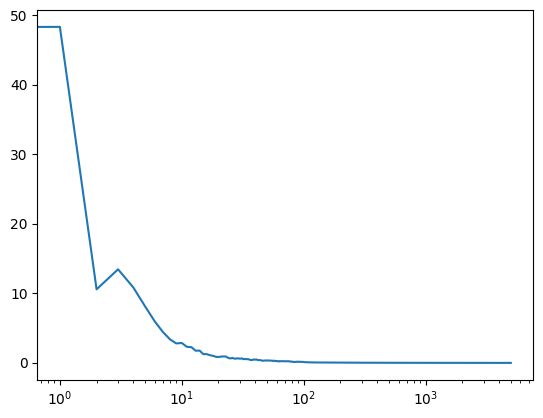

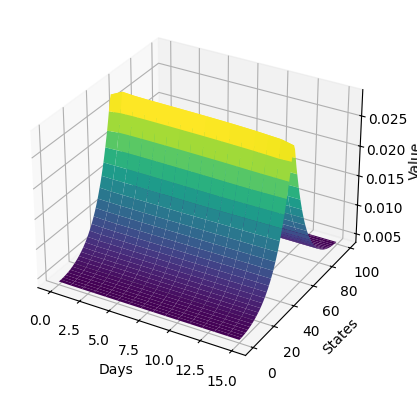

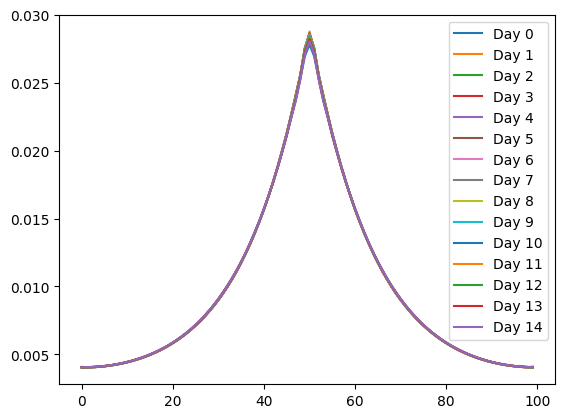

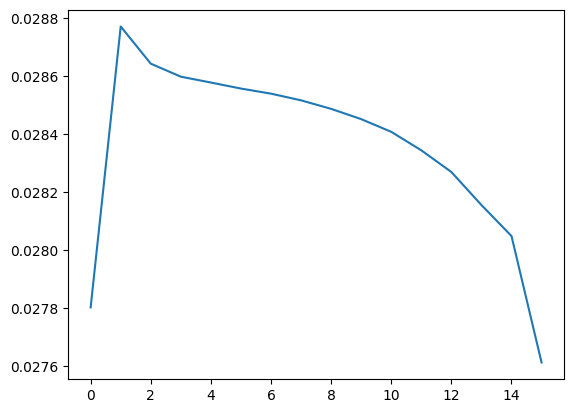

In [4]:
plt.plot(expls)
plt.xscale('log')

pi = solns[-1]
L = mean_field(instance, pi)
mu = torch.sum(L, axis=2)

mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Days")
ax.set_ylabel("States")
ax.set_zlabel("Value")

plt.show()

for day in range(15):
    plt.plot(mu[day, :], label=f"Day {day}")
plt.legend()
plt.show()
plt.plot(mu[:, 50])

### Beach Bar with terminal cost and no action cost

torch.Size([100, 3])
            MFGLib v0.1.1 : A Library for Mean-Field Games             
                  (c) RADAR Research Lab, UC Berkeley                  

Environment summary:
	S=(100,)
	A(3,)
	T=15
	r_max=100

Algorithm summary:
	FictitiousPlay(alpha=None)
	atol=1e-05
	rtol=1e-05
	max_iter=5000

-----------------------------------------------------------------------
| iter |  expl_n  | expl_n / expl_0 | argmin_{0..n} expl_i | time (s) |
-----------------------------------------------------------------------
|  0   | 4.62648  |     1.00000     |          0           |  0.000   |
|  0   | 4.62648  |     1.00000     |          0           |  0.000   |
|  1   | 48.65506 |    10.51664     |          0           |  0.010   |
|  2   | 10.54180 |     2.27858     |          0           |  0.021   |
|  3   | 13.53325 |     2.92517     |          0           |  0.032   |
|  4   | 11.33588 |     2.45021     |          0           |  0.042   |
|  5   | 8.74556  |     1.89032     |      

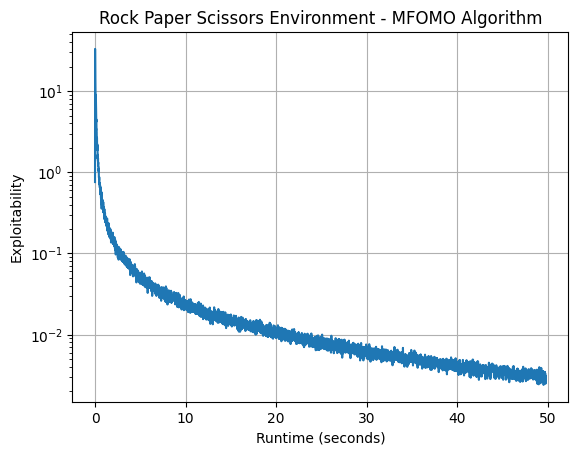

In [5]:
instance = Environment.beach_bar_terminal(n=100, bar_loc=50, T=15, action_cost_weight=0)

solns, expls, runtimes = FictitiousPlay(update_initial=True).solve(instance, max_iter=5000, verbose=True)

plt.semilogy(runtimes, exploitability_score(instance, solns)) 
plt.grid(True)
plt.xlabel("Runtime (seconds)")
plt.ylabel("Exploitability")
plt.title("Rock Paper Scissors Environment - MFOMO Algorithm")
plt.show()

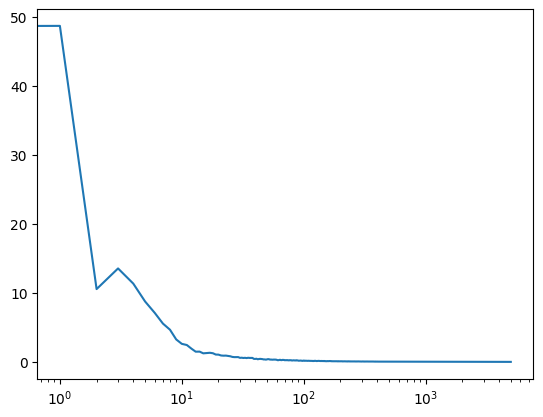

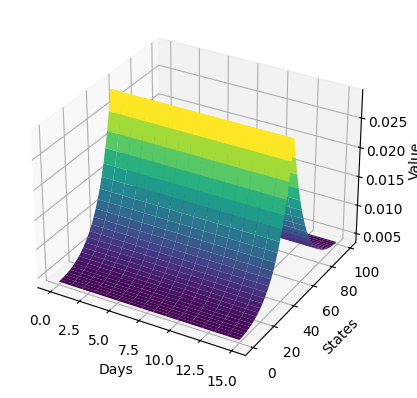

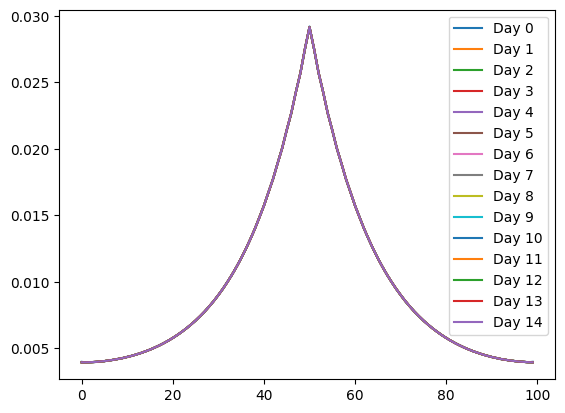

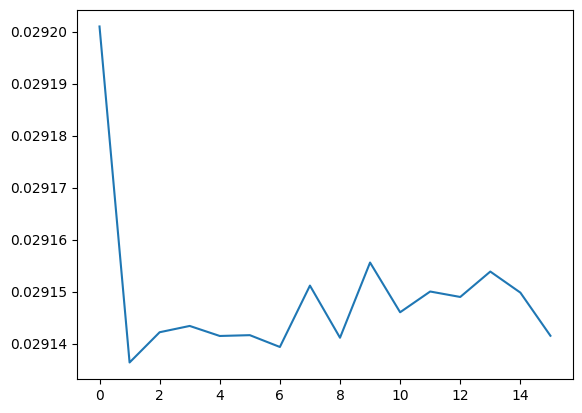

In [6]:
plt.plot(expls)
plt.xscale('log')

pi = solns[-1]
L = mean_field(instance, pi)
mu = torch.sum(L, axis=2)

mu_np = mu.numpy()

# Create meshgrid for X (days) and Y (states)
days = np.arange(mu.shape[0])  # [0, 1, 2]
states = np.arange(mu.shape[1])  # [0, 1, 2, 3]
X, Y = np.meshgrid(days, states, indexing='ij')  # Use 'ij' to align correctly

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, mu_np, cmap='viridis')

# Labels
ax.set_xlabel("Days")
ax.set_ylabel("States")
ax.set_zlabel("Value")

plt.show()

for day in range(15):
    plt.plot(mu[day, :], label=f"Day {day}")
plt.legend()
plt.show()
plt.plot(mu[:, 50])